In [1]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np

When working with matplotlib we usually do 

In [2]:
import matplotlib.pyplot as plt

and then some magic to get plots to show up here

In [3]:
%matplotlib inline

Which we can check:

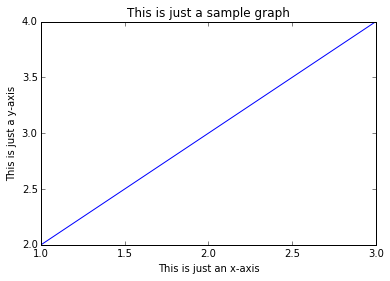

In [8]:
plt.plot([1,3],[2,4])
plt.title("This is just a sample graph")
plt.xlabel("This is just an x-axis")
plt.ylabel("This is just a y-axis")

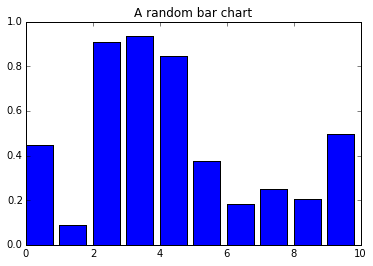

In [10]:
plt.bar(range(10), np.random.rand(10))
plt.title("A random bar chart")

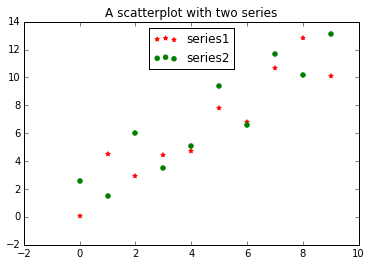

In [16]:
xs = range(10)
plt.scatter(xs, 5 * np.random.rand(10) + xs, color='r', marker='*', label='series1')
plt.scatter(xs, 5 * np.random.rand(10) + xs, color='g', marker='o', label='series2')
plt.title("A scatterplot with two series")
plt.legend(loc=9)

Now let's pull in our bike share data

In [17]:
weather = pd.read_table('daily_weather.tsv', parse_dates=['date'])
stations = pd.read_table('stations.tsv')
usage = pd.read_table('usage_2012.tsv', parse_dates=['time_start', 'time_end'])
weather.index = pd.DatetimeIndex(weather['date'])
weather.season_desc = weather.season_desc.map({'Spring' : 'Winter', 'Winter' : 'Fall', 'Fall' : 'Summer', 'Summer' : 'Spring' })

We can now plot the temperature across the year:

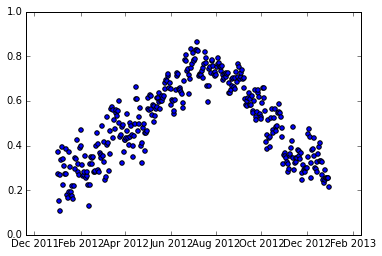

In [28]:
plt.scatter(weather.index, weather.temp)

Or look at the scatterplot of temperature and humidity:

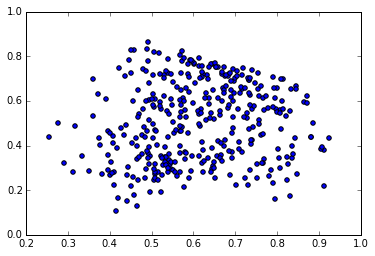

In [30]:
plt.scatter(weather.humidity, weather.temp)

Or look at the scatter between the number of riders and temperature:

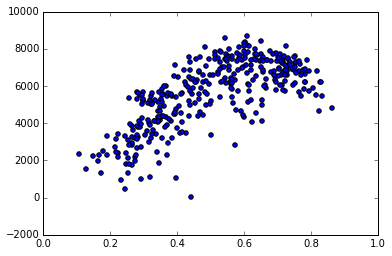

In [32]:
plt.scatter(weather.temp, weather.total_riders)

Let's break that down by season.  That gives us a good example of mixing vanilla Python code with matplotlib code:

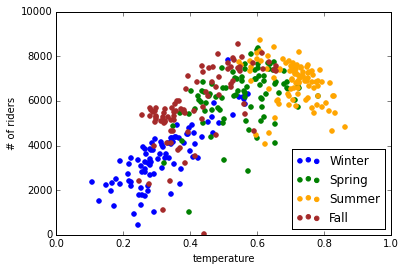

In [41]:
for season, color in zip(['Winter','Spring','Summer','Fall'],['blue','green','orange','brown']):
    temps = weather[weather.season_desc == season].temp
    riders = weather[weather.season_desc == season].total_riders
    plt.scatter(temps, riders, color=color, label=season)
plt.legend(loc=4)
plt.ylim([0, 10000])
plt.xlabel("temperature")
plt.ylabel("# of riders")

Scatterplot matrix

In [42]:
from pandas.tools.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0214341590>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f02126d31d0>]], dtype=object)

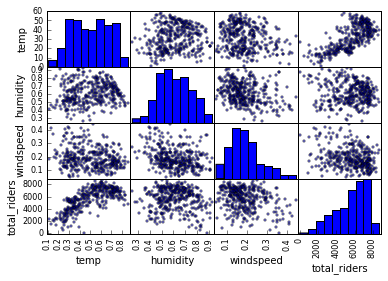

In [46]:
scatter_matrix(weather[['temp', 'humidity', 'windspeed', 'total_riders']])

You can also call plots directly on the dataframes (or series) themselves:

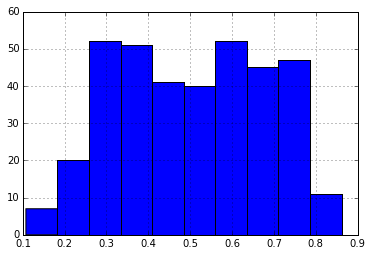

In [47]:
weather['temp'].hist()

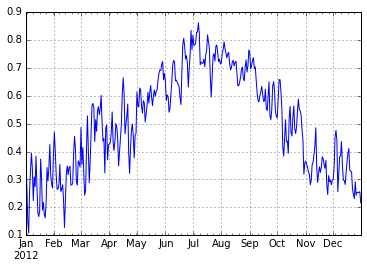

In [48]:
weather['temp'].plot()

In [61]:
avg_daily_trips = usage.groupby('station_start').size() / 365
trips = DataFrame({ 'avg_daily_trips' : avg_daily_trips })
station_geos = stations[['station', 'lat', 'long']]
trips_by_geo = pd.merge(station_geos, trips, left_on='station', right_index=True)
trips_by_geo

,station,lat,long,avg_daily_trips
0,20th & Bell St,38.856100,-77.051200,4.624658
2,20th & Crystal Dr,38.856400,-77.049200,14.008219
3,15th & Crystal Dr,38.860170,-77.049593,8.476712
4,Aurora Hills Community Ctr/18th & Hayes St,38.857866,-77.059490,5.441096
5,Pentagon City Metro / 12th & S Hayes St,38.862303,-77.059936,11.591781
6,S Joyce & Army Navy Dr,38.863700,-77.063300,10.408219
7,Crystal City Metro / 18th & Bell St,38.857300,-77.051100,35.956164
8,12th & Army Navy Dr,38.862900,-77.052800,10.210959
9,27th & Crystal Dr,38.848441,-77.051516,24.057534
10,S Glebe & Potomac Ave,38.842600,-77.050200,11.994521


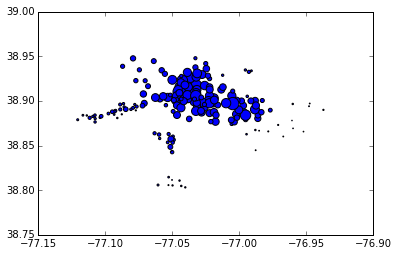

In [62]:
plt.scatter(trips_by_geo['long'], trips_by_geo['lat'], s=trips_by_geo['avg_daily_trips'])